# Naive Bayes

## Introduction

We will start by working on the Iris dataset. Recall that Iris dataset contains iris species and sepal and petal measurements. We will quickly explore the dataset and jump into Naive Bayes.

In [ ]:
from __future__ import print_function
import os
data_path = ['..', '..', 'data']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Question 1

* Load the Iris dataset.
* Take a quick look at the data types.
* Look at the skew values and decide if any transformations need to be applied. You can use skew value 0.75 as a threshold.
* Use `sns.pairplot` to plot the pairwise correlations and histograms. Use `hue="species"` as a keyword argument in order to see the distribution of species.

In [ ]:
import pandas as pd
import numpy as np

filepath = '/content/drive/My Drive/Colab Notebooks/Datasets/Iris_Data.csv'


data = pd.read_csv(filepath, sep=',')
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Notice that aside from the predictor variable, everything is float.

In [ ]:
skew = pd.DataFrame(data.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

<ipython-input-5-67b82e579234>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skew = pd.DataFrame(data.skew())


,skew,too_skewed
sepal_length,0.314911,False
sepal_width,0.334053,False
petal_length,-0.274464,False
petal_width,-0.104997,False


Fields are not too badly skewed.

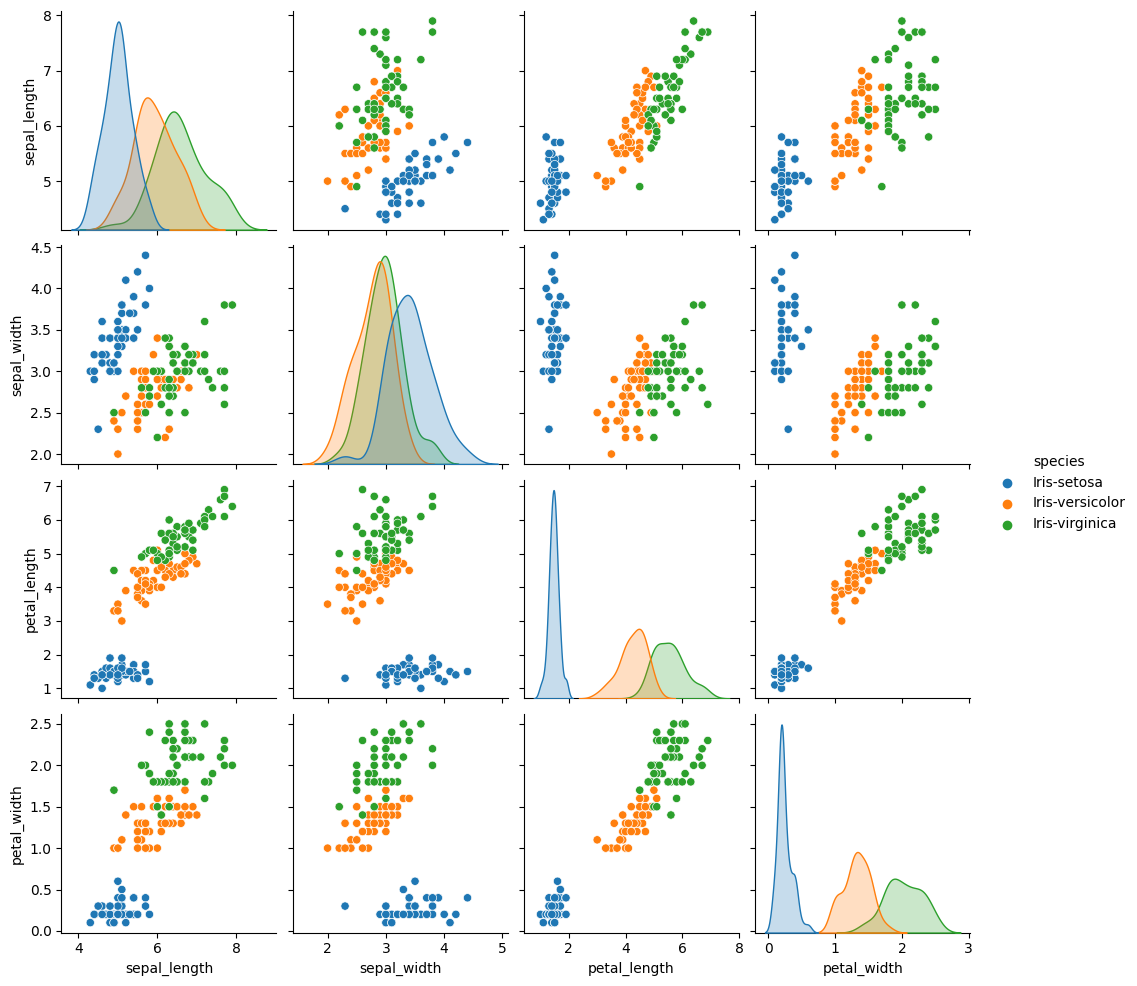

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.pairplot(data, hue='species')

## Question 2

Let's now fit a Naive Bayes classifier to this data in order to predict "species".

* Pick the appropriate type of Naive Bayes given the nature of your dataset (data types of columns). Recall, choices are
    * GaussianNB
    * MultinomialNB
    * BernoulliNB
* Use `cross_val_score` to see how well your choice works.

In [ ]:
# Since the features are continuous, the right choice is GaussianNB

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

X = data[data.columns[:-1]]
y = data.species

GNB = GaussianNB()
cv_N = 4
scores = cross_val_score(GNB, X, y, n_jobs=cv_N, cv=cv_N)
print(scores)
np.mean(scores)

[0.94736842 0.94736842 0.91891892 1.        ]


0.9534139402560455

## Question 3:

Now let's try all types of Naive Bayes and observe what happens

* Compare the cross validation scores for Gaussian, Bernouilli and Multinomial Naive Bayes.
* Why is BernoulliNB performing like it does?

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

X = data[data.columns[:-1]]
y = data.species

nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}

scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X, y, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.9534139402560455,
 'bernoulli': 0.3200568990042674,
 'multinomial': 0.966394025604552}

Looks like `BernoulliNB` results are very bad, but `MultinomialNB` is doing a very good job.  

`BernoulliNB` expects binary data, that is why it is not able to handle this type of dataset.
`MultinomialNB` theoretically expects counts, and is able to work with continuous data. Since some of the fields are very predictive, it happens to work.

## Question 4:

Let's see what happens when we take away the predictive features.

* Check the pairplot histograms (diagonal) you produced above and identify the two most predictive features visually.
* Remove the *petal_* features which are very predictive, and re-do the comparison above. That is, get the cross validation scores for all types of Naive Bayes.

In [ ]:
X = data[['sepal_length', 'sepal_width']]
y = data.species

nb = {'gaussian': GaussianNB(),
      'bernoulli': BernoulliNB(),
      'multinomial': MultinomialNB()}

scores = {}
for key, model in nb.items():
    s = cross_val_score(model, X, y, cv=cv_N, n_jobs=cv_N, scoring='accuracy')
    scores[key] = np.mean(s)
scores

{'gaussian': 0.7933854907539118,
 'bernoulli': 0.3200568990042674,
 'multinomial': 0.6465149359886202}

Taking away the very predictive features, we see the clear advantage of GaussianNB over the other choices.

## Question 5

This question explores how Naive Bayes algorithms can be affected when we push the underlying (naive) assumption too much. Recall that the naive assumption is that the features in the training set are *independent* from each other.

* Create **0, 1, 3, 5, 10, 50, 100** copies of `sepal_length` and fit a `GaussianNB` for each one.
* Keep track of the save the average `cross_val_score`.
* Create a plot of the saved scores over the number of copies.

<ipython-input-10-0d5712888dc9>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_new['sepal_length_copy%s' % i] = X['sepal_length']


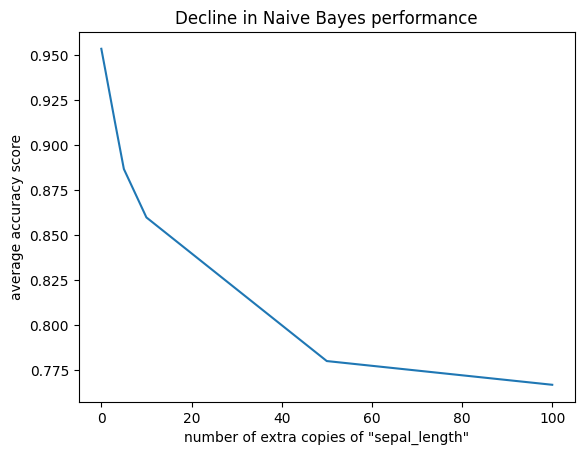

In [ ]:
X = data[data.columns[:-1]]
y = data.species

n_copies = [0, 1, 3, 5, 10, 50, 100]


def create_copies_sepal_length(X, n):
    X_new = X.copy()
    for i in range(n):
        X_new['sepal_length_copy%s' % i] = X['sepal_length']
    return X_new


def get_cross_val_score(n):
    X_new = create_copies_sepal_length(X, n)
    scores = cross_val_score(GaussianNB(), X_new, y, cv=cv_N, n_jobs=cv_N)
    return np.mean(scores)


avg_scores = pd.Series(
    [get_cross_val_score(n) for n in n_copies],
    index=n_copies)

ax = avg_scores.plot()
ax.set(
    xlabel='number of extra copies of "sepal_length"',
    ylabel='average accuracy score',
    title='Decline in Naive Bayes performance');

## Question 6

In this question, we'll explore discretizing the dataset and then fitting MultinomialNB.  

* Load the Human Activity Recognition dataset.
* Look at the data types. It's all continuous except for the target.
* Create `X` and `y` from `data`. `y` is the "Activity" column.
* Create training and test splits.
* Fit a GaussianNB to the training split.
* Get predictions on the test set.
* use `sns.heatmap` to plot the confusion matrix for predictions.

In [ ]:
import pandas as pd
import numpy as np

filepath = '/content/drive/My Drive/Colab Notebooks/Datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv'
data = pd.read_csv(filepath, sep=',')
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

In [ ]:
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,WALKING_UPSTAIRS
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,WALKING_UPSTAIRS
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,WALKING_UPSTAIRS
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,WALKING_UPSTAIRS


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Activity', axis=1)
y = data.Activity
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)

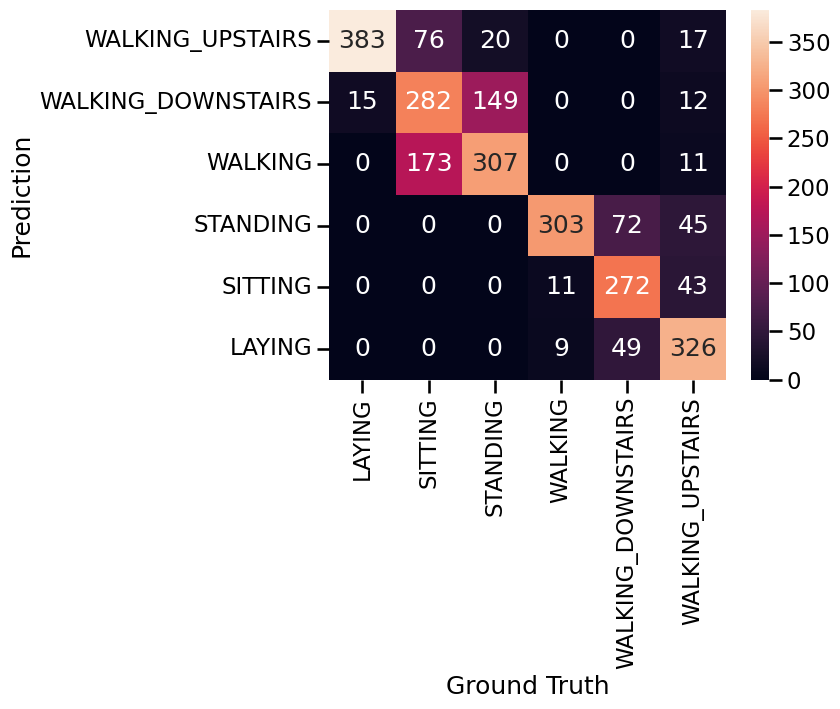

In [ ]:
from sklearn.metrics import confusion_matrix

gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)
ypred = pd.Series(gnb.predict(Xtest))
labels = sorted(ytest.unique())

cm = pd.DataFrame(confusion_matrix(ytest, ypred, labels=labels),
                  columns=labels, index=labels)
sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=True, yticklabels=True)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels[::-1])
ax.set_ylabel('Prediction')
ax.set_xlabel('Ground Truth');

In [ ]:


s = cross_val_score(gnb, X, y, scoring='accuracy')
np.mean(s)


0.7403681681653362

## Question 7

Now, let's discretize the dataset from Question 6. There are many ways to do this, but we'll use `pd.DataFrame.rank(pct=True)`.

* Create `X_discrete` from `X` using .rank(pct=True)
* Look at the values. They are still not discrete. Modify `X_discrete` so that it is indeed discrete. (Hint: try to get the first 2 digits using `.applymap`)
* Split `X_discrete` and `y` into training and test datasets
* Fit a MultinomialNB to the training split.
* Get predictions on the test set.
* Plot the confusion matrix for predictions.

In [ ]:
X_discrete = X.rank(pct=True)
X_discrete.sample(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
1238,0.320711,0.597728,0.110690,0.744538,0.955238,0.615400,0.721138,0.950481,0.618798,0.801486,...,0.277891,0.738324,0.665210,0.733275,0.206428,0.013205,0.777745,0.337703,0.708612,0.432760
6572,0.163899,0.572094,0.224391,0.788912,0.738518,0.755510,0.800175,0.764443,0.745315,0.817215,...,0.292067,0.582387,0.510147,0.922517,0.813671,0.647247,0.520827,0.451500,0.721332,0.784639
1005,0.262453,0.116419,0.393533,0.314302,0.362171,0.423730,0.318575,0.369939,0.431013,0.183319,...,0.715215,0.765705,0.785513,0.520827,0.239441,0.710360,0.248082,0.432081,0.763569,0.351879
2523,0.030683,0.936596,0.118264,0.604913,0.859986,0.994271,0.608894,0.895524,0.994563,0.645014,...,0.484901,0.158947,0.147490,0.896592,0.828527,0.825517,0.434411,0.795611,0.932324,0.990873
8161,0.587436,0.459365,0.202641,0.357316,0.418876,0.470531,0.337508,0.412273,0.468978,0.389844,...,0.491990,0.886882,0.913778,0.287018,0.474318,0.665793,0.292844,0.071755,0.316730,0.728323


In [ ]:
X_discrete = X_discrete.applymap(lambda r: int(r*100))
X_discrete.sample(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
9025,17,1,6,67,71,91,67,74,93,65,...,36,43,44,25,48,97,16,67,77,92
8604,42,55,66,45,52,51,44,52,51,47,...,44,90,91,69,44,39,43,4,31,40
731,35,80,74,39,41,35,38,39,35,40,...,58,76,80,55,20,26,21,12,30,32
9702,13,36,82,92,98,86,92,97,80,90,...,56,87,84,94,6,7,8,36,74,68
4086,54,39,60,41,3,19,43,3,17,36,...,73,3,5,22,24,57,81,85,12,5


In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X_discrete, y)

mnb = MultinomialNB()
mnb.fit(Xtrain, ytrain)

MultinomialNB()

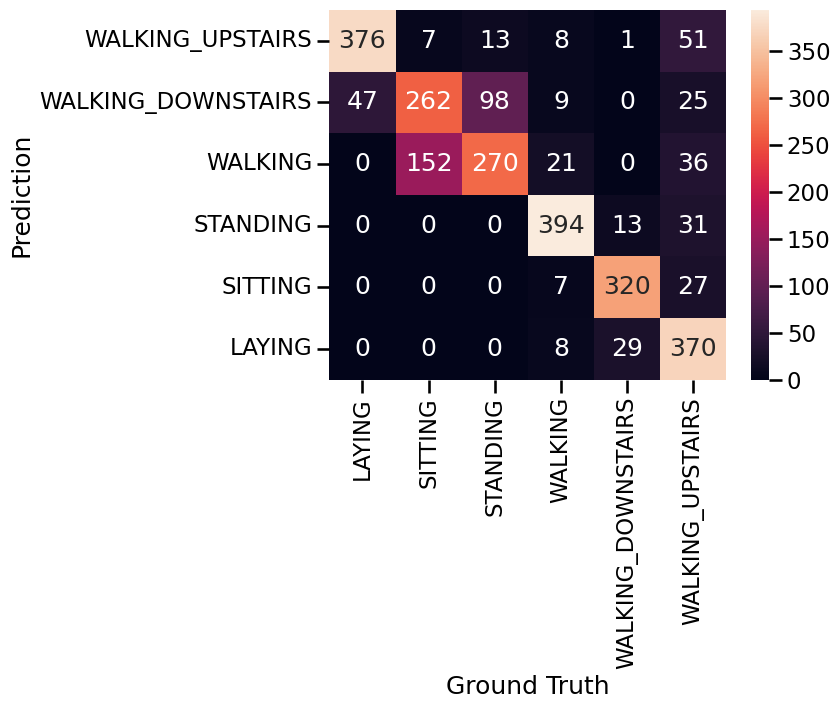

In [ ]:
ypred = pd.Series(mnb.predict(Xtest))
labels = sorted(ytest.unique())

cm = pd.DataFrame(confusion_matrix(ytest, ypred, labels=labels),
                  columns=labels, index=labels)
sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d', xticklabels=True, yticklabels=True)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels[::-1])
ax.set_ylabel('Prediction')
ax.set_xlabel('Ground Truth');

In [ ]:


s = cross_val_score(mnb, X_discrete, y, scoring='accuracy')
np.mean(s)



0.7669730333793858

# Exercises: 
Use the Naive Bayes Exercise ANSWERS .ipynb notebook in the Instructional Materials. 

Show the classification report and AUC ROC score and curve of the following Naive Bayes models:

Gaussian Naive 
Multinomial Naive
Interpret your result. 

Create a new model using grid search or random search

Compute the accuracy, confusion matrix and classification report

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

In [ ]:
filepath = '/content/drive/My Drive/Colab Notebooks/Datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv'
data = pd.read_csv(filepath, sep=',')

In [ ]:
print(data.columns)

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity'],
      dtype='object', length=562)


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelEncoder

gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)
ypred = gnb.predict(Xtest)

# Convert labels to numeric format
le = LabelEncoder()
ytest_numeric = le.fit_transform(ytest)

# Classification report
print(classification_report(ytest, ypred))

# AUC ROC score
auc_score = roc_auc_score(ytest_numeric, gnb.predict_proba(Xtest), multi_class='ovr')
print(f"AUC ROC score: {auc_score:.2f}")


                    precision    recall  f1-score   support

            LAYING       0.96      0.77      0.86       496
           SITTING       0.53      0.62      0.57       458
          STANDING       0.64      0.63      0.63       491
           WALKING       0.94      0.72      0.82       420
WALKING_DOWNSTAIRS       0.69      0.83      0.76       326
  WALKING_UPSTAIRS       0.72      0.85      0.78       384

          accuracy                           0.73      2575
         macro avg       0.75      0.74      0.74      2575
      weighted avg       0.75      0.73      0.73      2575

AUC ROC score: 0.95


In [ ]:
from sklearn.metrics import classification_report, roc_auc_score

# Classification report
print("Classification Report:\n", classification_report(ytest, ypred))

# AUC ROC score
auc_roc = roc_auc_score(ytest, mnb.predict_proba(Xtest), multi_class='ovr')

print("AUC ROC Score:", auc_roc)


Classification Report:
                     precision    recall  f1-score   support

            LAYING       0.96      0.10      0.18       496
           SITTING       1.00      0.00      0.00       458
          STANDING       0.36      0.98      0.52       491
           WALKING       0.00      0.00      0.00       420
WALKING_DOWNSTAIRS       0.86      0.04      0.07       326
  WALKING_UPSTAIRS       0.33      1.00      0.50       384

          accuracy                           0.36      2575
         macro avg       0.58      0.35      0.21      2575
      weighted avg       0.59      0.36      0.22      2575

AUC ROC Score: 0.9406427993646789


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#In general, an AUC ROC score closer to 1.0 indicates a better model performance

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [ ]:
data.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
Length: 562, dtype: object

In [ ]:
X = data.drop('Activity', axis=1)
y = data['Activity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svc = SVC()
grid = GridSearchCV(svc, param_grid, cv=5)
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [ ]:
best_svc = grid.best_estimator_
y_pred = best_svc.predict(X_test)
accuracy = (y_pred == y_test).mean()
print('Accuracy:', accuracy)

Accuracy: 0.9841423948220065


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Compute the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Compute the confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion matrix:\n', conf_mat)

# Compute the classification report
class_report = classification_report(y_test, y_pred)
print('Classification report:\n', class_report)


Accuracy: 0.9841423948220065
Confusion matrix:
 [[596   0   0   0   1   0]
 [  4 538  19   0   0   2]
 [  0  18 529   0   0   0]
 [  0   0   0 537   1   1]
 [  0   0   0   0 420   0]
 [  0   0   0   1   2 421]]
Classification report:
                     precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       597
           SITTING       0.97      0.96      0.96       563
          STANDING       0.97      0.97      0.97       547
           WALKING       1.00      1.00      1.00       539
WALKING_DOWNSTAIRS       0.99      1.00      1.00       420
  WALKING_UPSTAIRS       0.99      0.99      0.99       424

          accuracy                           0.98      3090
         macro avg       0.98      0.99      0.98      3090
      weighted avg       0.98      0.98      0.98      3090



In [ ]:
#higher result at 0.98 Accuracy